<a href="https://colab.research.google.com/github/CrowdSalat/ann-dynamical-systems/blob/master/explore_xplane_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# explore xplane data

## pip install (normal jupyter only)

In [0]:
# only be relevant for 'not colab' notebooks. colab got these pre installed. 
! pip3 install pandas
! pip3 install matplotlib
! pip3 install googledrivedownloader
! pip3 install requests #for googledrivedownloader
! pip3 install pandas
! pip3 install scikit-learn
#consider using conda as package manager, because it uses already compiled libs.
# tf is considerably faster when installed with conda according to: TODO find website..
! pip3 install tensorflow 


## imports

In [0]:
from google_drive_downloader import GoogleDriveDownloader as gdd
import pandas as pd
import os, sys
import csv


## load csv files 

In [0]:
file_mismatch = 'trainingsset_mismatch_00.csv'
file0 = 'trainingsset_00.csv'
files = [file_mismatch, file0]

### in collab 
just mount the drive to access the files:

In [4]:
from google.colab import drive
drive.mount('/content/drive')

root_dir = '/content/drive/My Drive/xplane_data' 
os.chdir(root_dir)
print ('working dir: ' + os.getcwd())


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
working dir: /content/drive/My Drive/xplane_data


### in normal jupyter notebook 
download the files from google drive to your local working directory:


In [0]:
root_dir = os.getcwd()

if not root_dir.endswith('data'):
  os.mkdir('./data')
  os.chdir('./data')


print ('working dir: ' + root_dir)


gdd.download_file_from_google_drive(file_id='14qCHOrPH8aDUY_AvzzYpORNhW0PFXkC_',
                                    dest_path='./'+file_mismatch,
                                    )

gdd.download_file_from_google_drive(file_id='1h6y6kWLPduY_gKPM0-GVt4t57uF1_Wr6',
                                    dest_path='./'+file0,
                                    )

#alternativly save all as zip an extract them:
#gdd.download_file_from_google_drive(file_id='',
#                                    dest_path='./data/traindata.zip',
#       

working dir: /content/drive/My Drive/xplane_data


## check and parse csv data

### check for formatation error and print headers

In [6]:
# xplane somehow messes up the csv files, therefor check if column count in head and data machtes
# if so, save all header names in list and print them
print ('working dir: ' + os.getcwd())

headers = {}

for file in files:
  with open(file) as csvfile:
    csvreader = csv.reader(csvfile, delimiter='|')
    header = next(csvreader)
    data =next(csvreader)
    if len(header) == len(data): 
      header = header[:-1] # last on in header and data is just space
      headers[file] = header
      print(file + ': is ok.' )
    else:
      print(file + ': got mismatched header and data columns.' )

print(headers)
print('')


working dir: /content/drive/My Drive/xplane_data
trainingsset_mismatch_00.csv: got mismatched header and data columns.
trainingsset_00.csv: is ok.
{'trainingsset_00.csv': ['  _real,_time ', '   _totl,_time ', '   missn,_time ', '   timer,_time ', '   _zulu,_time ', '   local,_time ', '   hobbs,_time ', '   _Vind,_kias ', '   _Vind,_keas ', '   Vtrue,_ktas ', '   Vtrue,_ktgs ', '   _Vind,__mph ', '   Vtrue,mphas ', '   Vtrue,mphgs ', '   _Mach,ratio ', '   __VVI,__fpm ', '   Gload,norml ', '   Gload,axial ', '   Gload,_side ', '   _elev,stick ', '   ailrn,stick ', '   ruddr,stick ', '   _elev,astab ', '   ailrn,astab ', '   ruddr,astab ', '   _elev,_surf ', '   ailrn,_surf ', '   ruddr,_surf ', '   nwhel,steer ', '   ____M,_ftlb ', '   ____L,_ftlb ', '   ____N,_ftlb ', '   ____Q,rad/s ', '   ____P,rad/s ', '   ____R,rad/s ', '   pitch,__deg ', '   _roll,__deg ', '   hding,_true ', '   hding,__mag ', '   alpha,__deg ', '   _beta,__deg ', '   hpath,__deg ', '   vpath,__deg ', '   _slip,__

### parse data

In [13]:
def load_xplane_csv(csv_path, columns):
    return pd.read_csv(csv_path, delimiter='|', usecols = columns,float_precision='high')

# relevante spalten definiert
m_time = '   missn,_time '
z_time = '   _zulu,_time '

yaw_v = '   ____Q,rad/s '
yaw_deg = '   hding,_true '

roll_deg = '   _roll,__deg '
roll_v = '   ____R,rad/s '

pitch_deg = '   pitch,__deg '
pitch_v = '   ____P,rad/s '

alt = '   __alt,ftmsl '
vv = '   __VVI,__fpm '

v = '   Vtrue,_ktas '
rpm_prop ='   rpm_1,_prop '

# TODO add thron, part and thron, part2 to dataoutput		

columns = [m_time,
          z_time,
          yaw_v,
          yaw_deg,
          roll_deg,
          roll_v,
          pitch_deg,
          pitch_v,
          vv,
          alt,
          v,
          rpm_prop,
          #TODO add throttle
           ]

#all_columns = headers[file0]

df = load_xplane_csv(file0, columns)
shape = df.shape
min_val = df.max(axis=0)
max_val = df.min(axis=0)

pprint(shape)
df.head(2)

(6486, 12)


,"missn,_time","_zulu,_time","Vtrue,_ktas","__VVI,__fpm","____Q,rad/s","____P,rad/s","____R,rad/s","pitch,__deg","_roll,__deg","hding,_true","__alt,ftmsl","rpm_1,_prop"
0,0.05025,16.17529,127.21453,2.38229,0.21780,0.28833,-0.00185,-1.99876,-0.10717,355.79102,1029.92627,2607.31152
1,0.12259,16.17531,127.18829,-5.80672,-0.02653,-0.04140,0.00434,-1.34120,0.05427,355.80017,1029.64880,2605.68115


## visualize data

In [19]:
df.describe()

,"missn,_time","_zulu,_time","Vtrue,_ktas","__VVI,__fpm","____Q,rad/s","____P,rad/s","____R,rad/s","pitch,__deg","_roll,__deg","hding,_true","__alt,ftmsl","rpm_1,_prop"
count,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000
mean,13.914098,16.221307,126.251535,43.509469,0.000680,0.000096,0.004307,-1.139605,1.554932,217.226486,1170.587264,2594.948327
std,12.677553,0.026565,2.296525,215.647192,0.006034,0.016759,0.008976,1.022880,3.461495,150.865369,106.422337,18.981730
min,0.015490,16.175290,120.779750,-537.317020,-0.062340,-0.056400,-0.003830,-3.807130,-0.208410,0.048110,970.717290,2550.119140
25%,5.214887,16.198415,124.676562,-12.564505,-0.000180,-0.000290,-0.000020,-1.400890,-0.135557,67.834553,1068.537660,2582.197695
50%,10.623845,16.220960,127.088390,3.257825,0.000010,0.000000,0.000040,-1.321975,-0.101340,356.082580,1199.530580,2601.057620
75%,16.860720,16.244177,127.523498,193.529208,0.000590,0.000130,0.001670,-0.455835,0.549978,356.123637,1271.585210,2604.595460
max,61.061310,16.267920,130.875500,537.934750,0.217800,0.288330,0.032000,1.068090,12.118770,359.946110,1272.172000,2635.342040


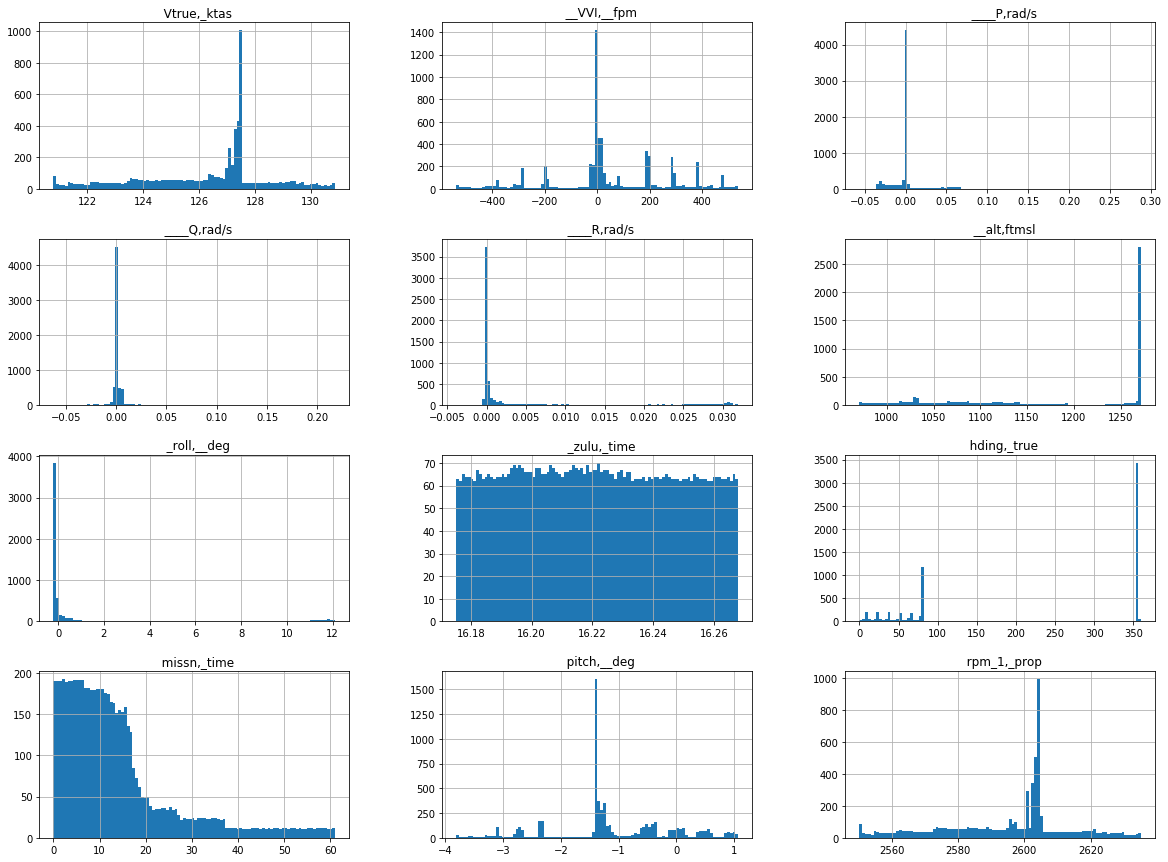

In [20]:
%matplotlib inline
# only in a Jupyter notebook
import matplotlib.pyplot as plt

df.hist(bins=100, figsize=(20,15))
plt.show()

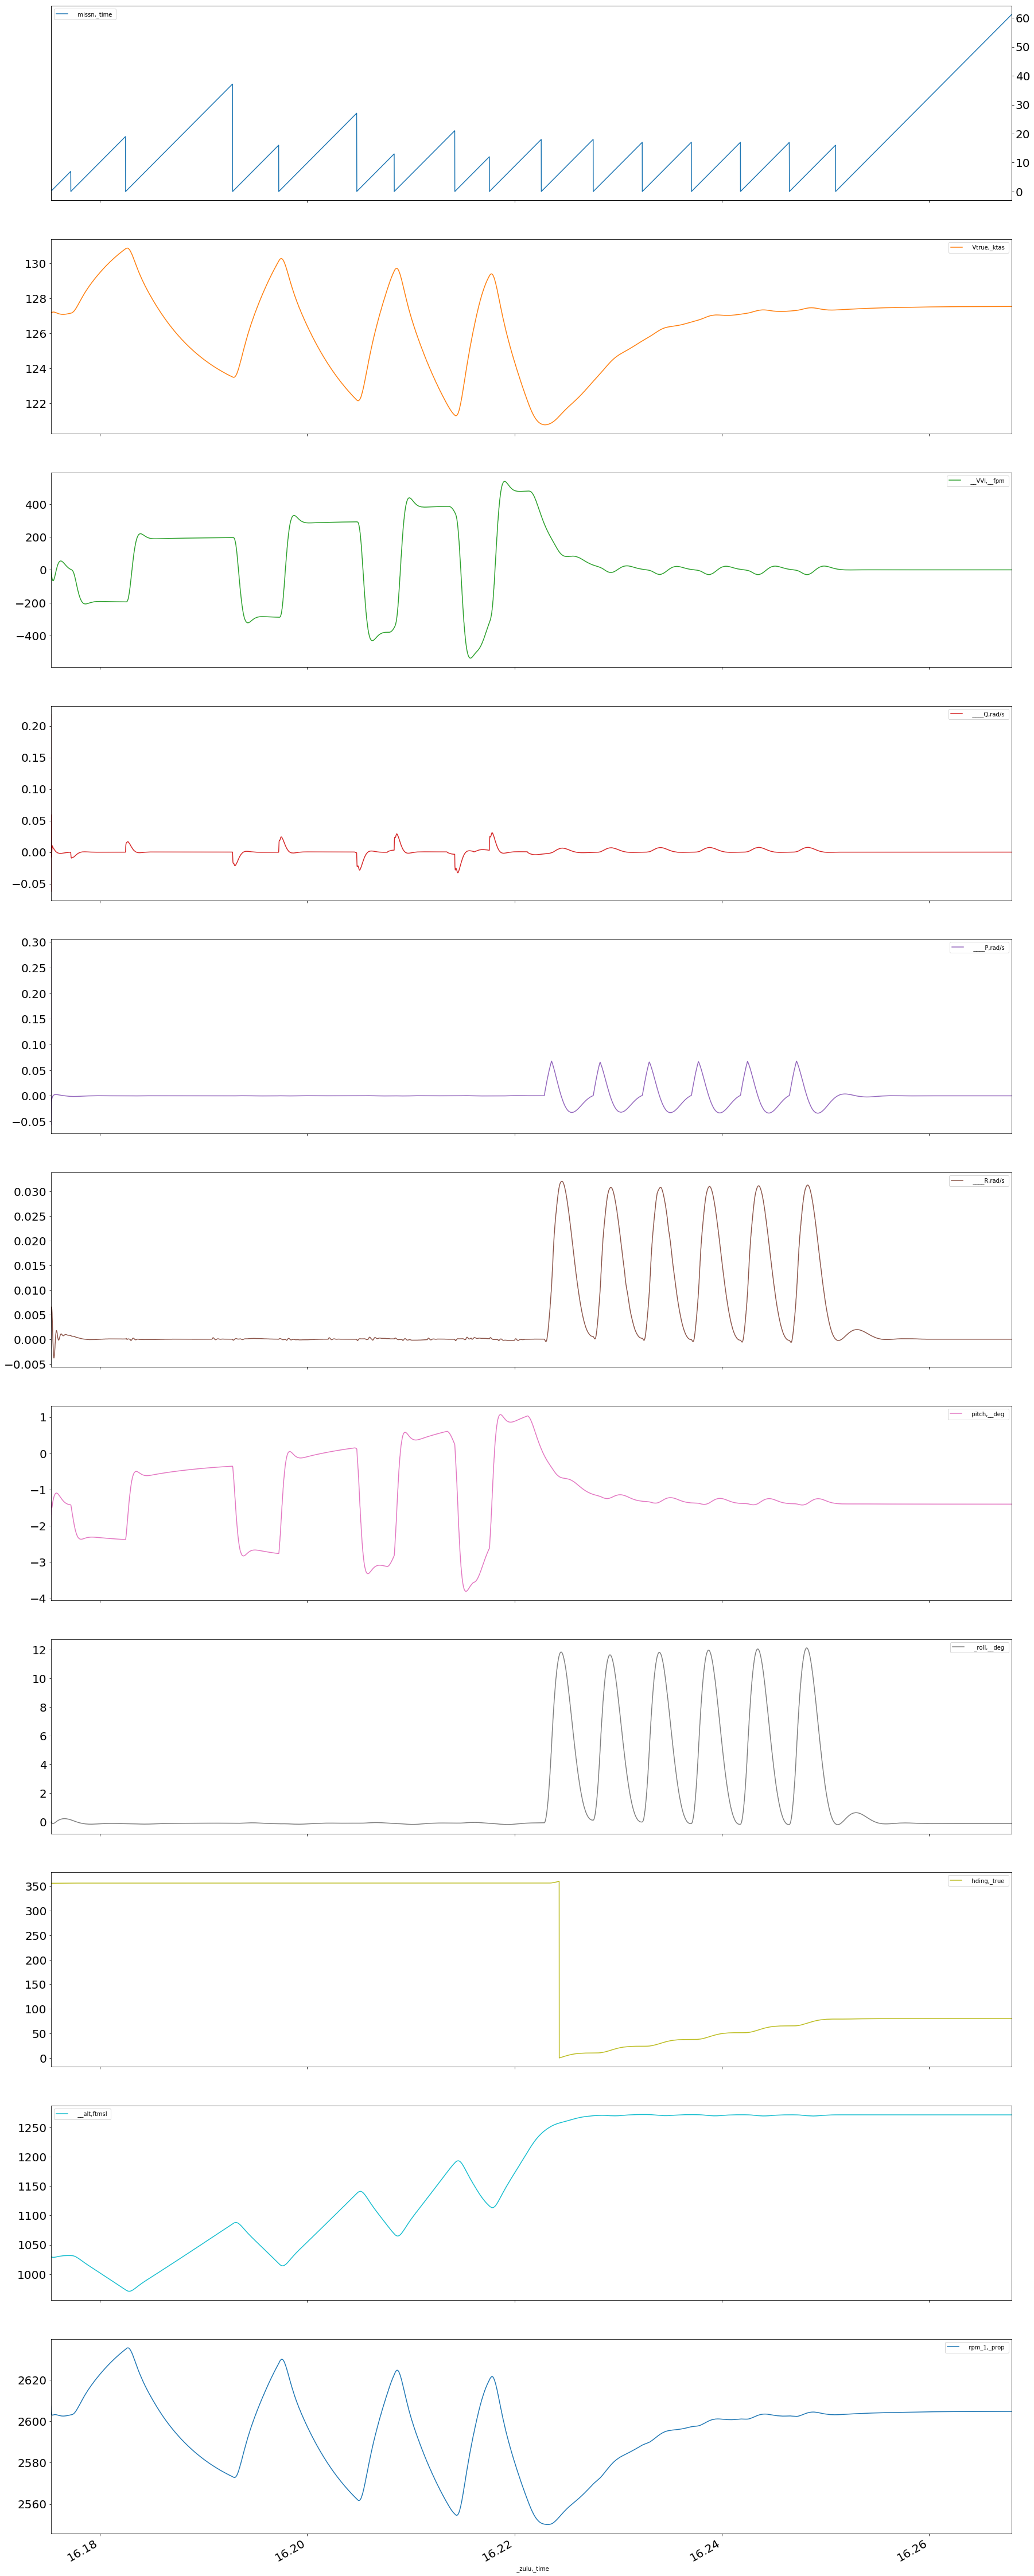

In [24]:
%matplotlib inline
# only in a Jupyter notebook
import matplotlib.pyplot as plt

df.plot.line(x=z_time, subplots = True, figsize = (30, 90), secondary_y=m_time, fontsize=20,legend=True );